In [8]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Добавляем путь к src для импорта наших модулей
sys.path.append('../src')

from database import load_corrosion_data
from analysis import CorrosionAnalyzer

# Настройка отображения
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Библиотеки загружены")

Библиотеки загружены


In [15]:
# Загрузка данных
df = load_corrosion_data()
print(f"Загружено {len(df)} записей")
df.head(20)

Загружено 442052 записей


,id,installation,equipment,mms,measurement_date,measurement,is_replaced,corrosion_rate,water_content,h2s_content,sulfur_content,chlorine_content,co2_content,oxygen_content,nitrogen_content,hydrogen_content,methane_content,ethane_content,propane_content,butane_content,isobutane_content,pentane_content,isopentane_content,gasoline_c6_c8_content,hexane_content,heavy_naphtha_content,kerosene_content,diesel_content,residues_content,propylene_content,ethylene_content,butylene_content,sulfuric_acid_content,hydrochloric_acid_content,acetic_acid_content,naphthenic_acid_content,ammonia_content,ammonium_content,hydrogen_fluoride_content,sodium_hydroxide_content,corrosion_inhibitor_content,total_components,total_composition,total_sulfur_compounds,total_chlorine_compounds,total_acids,start_date_of_operation,nominal_thickness_mmc,tmin_mmc,contour,operating_temperature,operating_pressure,component,material_code,material_type,outer_diameter,inner_diameter
0,390401,KK-2,T-1,001.1,2015-05-20,7.0,True,NaN,0.5941,0.002,1.96,NaN,NaN,NaN,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0001,None,0.0353,0.8755,39.4508,56.9022,NaN,NaN,NaN,None,NaN,None,None,None,NaN,NaN,NaN,NaN,9.0,100.0,1.96,0.0,0.0,2015-08-13,7.0,1.7,Контур 1,135.0,1.82,Участок 7,U10750,Углеродистая сталь,57.0,43.0
1,366963,KK-2,T-1,001.1,2018-10-03,6.2,False,0.237175,0.5941,0.002,1.96,NaN,NaN,NaN,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0001,None,0.0353,0.8755,39.4508,56.9022,NaN,NaN,NaN,None,NaN,None,None,None,NaN,NaN,NaN,NaN,9.0,100.0,1.96,0.0,0.0,2015-08-13,7.0,1.7,Контур 1,135.0,1.82,Участок 7,U10750,Углеродистая сталь,57.0,43.0
2,390402,KK-2,T-1,001.2,2015-05-20,7.0,True,NaN,0.5941,0.002,1.96,NaN,NaN,NaN,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0001,None,0.0353,0.8755,39.4508,56.9022,NaN,NaN,NaN,None,NaN,None,None,None,NaN,NaN,NaN,NaN,9.0,100.0,1.96,0.0,0.0,2015-08-13,7.0,1.7,Контур 1,135.0,1.82,Участок 7,U10750,Углеродистая сталь,57.0,43.0
3,366964,KK-2,T-1,001.2,2018-10-03,6.4,False,0.177881,0.5941,0.002,1.96,NaN,NaN,NaN,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0001,None,0.0353,0.8755,39.4508,56.9022,NaN,NaN,NaN,None,NaN,None,None,None,NaN,NaN,NaN,NaN,9.0,100.0,1.96,0.0,0.0,2015-08-13,7.0,1.7,Контур 1,135.0,1.82,Участок 7,U10750,Углеродистая сталь,57.0,43.0
4,390403,KK-2,T-1,001.3,2015-05-20,7.0,True,NaN,0.5941,0.002,1.96,NaN,NaN,NaN,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0001,None,0.0353,0.8755,39.4508,56.9022,NaN,NaN,NaN,None,NaN,None,None,None,NaN,NaN,NaN,NaN,9.0,100.0,1.96,0.0,0.0,2015-08-13,7.0,1.7,Контур 1,135.0,1.82,Участок 7,U10750,Углеродистая сталь,57.0,43.0
5,366965,KK-2,T-1,001.3,2018-10-03,6.1,False,0.266822,0.5941,0.002,1.96,NaN,NaN,NaN,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0001,None,0.0353,0.8755,39.4508,56.9022,NaN,NaN,NaN,None,NaN,None,None,None,NaN,NaN,NaN,NaN,9.0,100.0,1.96,0.0,0.0,2015-08-13,7.0,1.7,Контур 1,135.0,1.82,Участок 7,U10750,Углеродистая сталь,57.0,43.0
6,390404,KK-2,T-1,002.1,2015-05-20,7.0,True,NaN,0.5941,0.002,1.96,NaN,NaN,NaN,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0001,None,0.0353,0.8755,39.4508,56.9022,NaN,NaN,NaN,None,NaN,None,None,None,NaN,NaN,NaN,NaN,9.0,100.0,1.96,0.0,0.0,2015-08-13,7.0,1.7,Контур 1,135.0,1.82,Тройник (57*6)№1,U10750,Углеродистая сталь,57.0,43.0
7,366966,KK-2,T-1,002.1,2018-10-03,6.4,False,0.177881,0.5941,0.002,1.96,NaN,NaN,NaN,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0001,None,0.0353,0.8755,39.4508,56.9022,NaN,NaN,NaN,None,NaN,None,None,None,NaN,NaN,NaN,NaN,9.0,100.0,1.96,0.0,0.0,2015-08-13,7.0,1.7,Контур 1,135.0,1.82,Тройник (57*6)№1,U10750,Углеродистая сталь,57.0,43.0
8,390627,KK-2,T-1,002.2,2015-05-20,9.0,True,NaN,0.5941,0.002,1.96,NaN,NaN,NaN,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0001,None,0.0353,0.8755,39.4508,56.9022,NaN,NaN,NaN,None,NaN,None,None,None,NaN,NaN,NaN,NaN,9.0,100.0,1.96,0.0,0.0,2015-08-13,9.0,1.7,Контур 1,135.0,1.82,Тройник (57*6)№1,U10750,Углеродистая сталь,57.0,43.0
9,366278,KK-2,T-1,002.2,2018-10-03,8.3,False,0.207528,0.5941,0.002,1.96,NaN,NaN,NaN,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0001,None,0.0353,0.8755,39

In [16]:
# Базовая информация о данных
print("БАЗОВАЯ ИНФОРМАЦИЯ О ДАННЫХ:")
print(f"Размер данных: {df.shape}")
print(f"\nКолонки: {list(df.columns)}")

print("\nСтатистика по скорости коррозии:")
df['corrosion_rate'].describe()

БАЗОВАЯ ИНФОРМАЦИЯ О ДАННЫХ:
Размер данных: (442052, 57)

Колонки: ['id', 'installation', 'equipment', 'mms', 'measurement_date', 'measurement', 'is_replaced', 'corrosion_rate', 'water_content', 'h2s_content', 'sulfur_content', 'chlorine_content', 'co2_content', 'oxygen_content', 'nitrogen_content', 'hydrogen_content', 'methane_content', 'ethane_content', 'propane_content', 'butane_content', 'isobutane_content', 'pentane_content', 'isopentane_content', 'gasoline_c6_c8_content', 'hexane_content', 'heavy_naphtha_content', 'kerosene_content', 'diesel_content', 'residues_content', 'propylene_content', 'ethylene_content', 'butylene_content', 'sulfuric_acid_content', 'hydrochloric_acid_content', 'acetic_acid_content', 'naphthenic_acid_content', 'ammonia_content', 'ammonium_content', 'hydrogen_fluoride_content', 'sodium_hydroxide_content', 'corrosion_inhibitor_content', 'total_components', 'total_composition', 'total_sulfur_compounds', 'total_chlorine_compounds', 'total_acids', 'start_date_of

count    313193.000000
mean          0.087930
std           4.076940
min           0.000000
25%           0.000000
50%           0.024949
75%           0.049898
max         693.975000
Name: corrosion_rate, dtype: float64

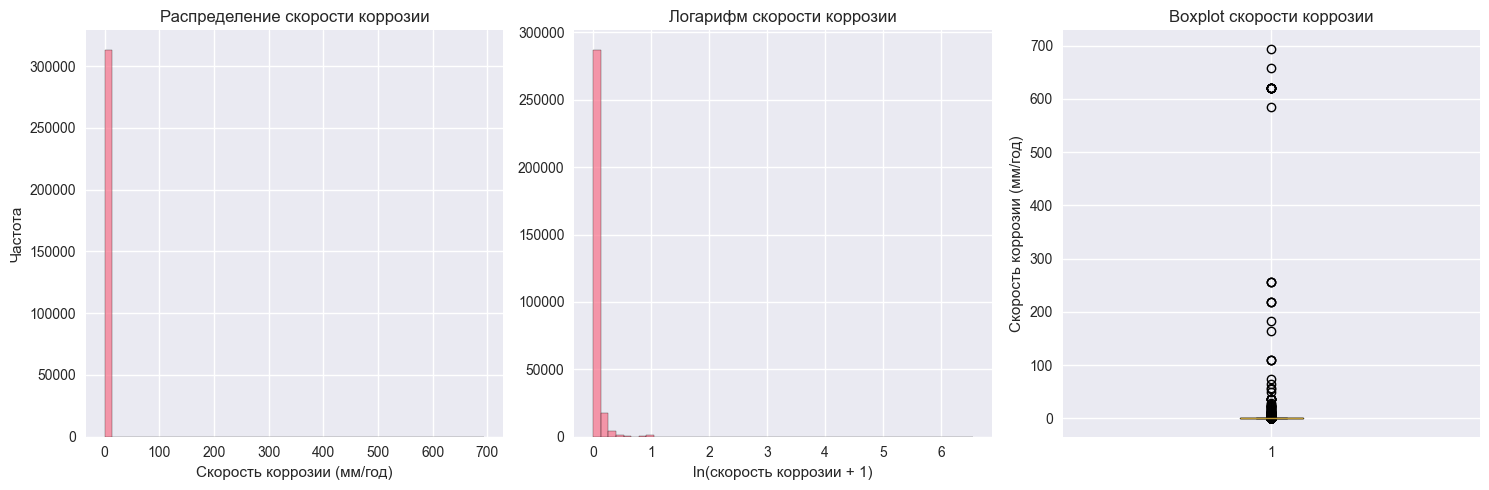

In [17]:
# Визуализация распределения скорости коррозии
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['corrosion_rate'].dropna(), bins=50, alpha=0.7, edgecolor='black')
plt.title('Распределение скорости коррозии')
plt.xlabel('Скорость коррозии (мм/год)')
plt.ylabel('Частота')

plt.subplot(1, 3, 2)
# Логарифмическая шкала для лучшего отображения
corrosion_log = np.log1p(df['corrosion_rate'].dropna())
plt.hist(corrosion_log, bins=50, alpha=0.7, edgecolor='black')
plt.title('Логарифм скорости коррозии')
plt.xlabel('ln(скорость коррозии + 1)')

plt.subplot(1, 3, 3)
plt.boxplot(df['corrosion_rate'].dropna())
plt.title('Boxplot скорости коррозии')
plt.ylabel('Скорость коррозии (мм/год)')

plt.tight_layout()
plt.show()